# Importing the data from Lab 1

The data from Lab 1 is available as two separate .csv files, which were written based on the values recorded during the Lab video.

These can be imported using numpy to import them directly into numpy arrays - there are lots of different ways to import data in Python, and lots of different structures they could be imported into. There is no single correct answer, and the following is just the way that I have taught myself to do it.

## Importing Data

I'll add some videos about data importing to my "Python for Engineers" video, but the basics are they you've got to learn to think like a computer - which is to say "like a really fast idiot, wearing blinkers, incapable of thinking outside the box at all".

Wherever the Jupyter notebook exists is the folder to which the current kernel has access. You can navigate to folders *within* here by using relative folder nomenclature e.g., ```TheFolder/TheFile```, and you can also access folders that are above this one, again using relative nomenclature, ```../../FileTwoDirectoriesAboveThis.file```.

Messing around *too* much with file structures can become problematic - so for these first two labs, I'll generally store the raw data in a folder called "Raw Data", and we can then access it from here as long as this folder is visible to the kernel. That is, it should be in the same folder as this notebook.

### Importing a CSV

The following syntax enables us to extract the salient information from the .csv files

```Resistor1_data  = np.genfromtxt(filename, delimiter=",", skip_header=1)```

```genfromtxt``` is a method available in numpy, which has been imported as ```np```. We tell if three things:
1. Where the .csv file is, which is ```filename```
2. What the delimiter is, which tells ```np.genfromtxt``` how to actually interpret the data. Without this, it will fail (remember, fast idiot)
3. How many header rows to ignore. If you leave this out, it will try and interpret the two top values as data and they'll export as "nan" which means "not a number". Try and change it and see what happens.

In [13]:
import numpy as np

# Filename to the first resistor
filename = "Raw Data/Resistor_1.csv"

# Import the data
Resistor1_data  = np.genfromtxt(filename, delimiter=",", skip_header=1)

# Filename to the second resistor
filename = "Raw Data/Resistor_2.csv"

# Import the data
Resistor2_data  = np.genfromtxt(filename, delimiter=",", skip_header=1)



# Checking the data

We can print the two arrays:

In [15]:
print(Resistor1_data)
print(Resistor2_data)

[[ 2.66  7.79]
 [ 3.35  9.81]
 [ 3.89 11.41]
 [ 4.59 13.56]
 [ 4.92 14.42]
 [ 5.45 15.99]
 [ 5.76 16.88]
 [ 6.56 19.26]
 [ 7.01 21.1 ]
 [ 7.94 23.9 ]
 [ 9.23 27.8 ]
 [ 9.9  29.9 ]]
[[2.680e+00 3.000e-02]
 [5.440e+00 5.000e-02]
 [7.470e+00 7.000e-02]
 [9.340e+00 9.000e-02]
 [1.287e+01 1.200e-01]
 [1.496e+01 1.400e-01]
 [1.719e+01 1.600e-01]
 [2.000e+01 1.900e-01]
 [2.210e+01 2.100e-01]
 [2.580e+01 2.400e-01]
 [2.750e+01 2.600e-01]
 [3.080e+01 2.900e-01]]


or be more elegant and format this using a couple of ```for``` loops, the ```enumerate``` command, and ```f-string``` syntax - all of which was covered in video 1 from intro to python.

In [21]:
for resistor_index, array_to_print in enumerate([Resistor1_data, Resistor2_data]):
    for Voltage, Current in array_to_print:
        print(f"For resistor {resistor_index+1:1.0f}, for applied voltage {Voltage:1.2f}V the current is {Current:1.3f}mA ")
    print("")

For resistor 1, for applied voltage 2.66V the current is 7.790mA 
For resistor 1, for applied voltage 3.35V the current is 9.810mA 
For resistor 1, for applied voltage 3.89V the current is 11.410mA 
For resistor 1, for applied voltage 4.59V the current is 13.560mA 
For resistor 1, for applied voltage 4.92V the current is 14.420mA 
For resistor 1, for applied voltage 5.45V the current is 15.990mA 
For resistor 1, for applied voltage 5.76V the current is 16.880mA 
For resistor 1, for applied voltage 6.56V the current is 19.260mA 
For resistor 1, for applied voltage 7.01V the current is 21.100mA 
For resistor 1, for applied voltage 7.94V the current is 23.900mA 
For resistor 1, for applied voltage 9.23V the current is 27.800mA 
For resistor 1, for applied voltage 9.90V the current is 29.900mA 

For resistor 2, for applied voltage 2.68V the current is 0.030mA 
For resistor 2, for applied voltage 5.44V the current is 0.050mA 
For resistor 2, for applied voltage 7.47V the current is 0.070mA 

Note that the units for the second column of both arrays are in mA and this has not been taken into account for the actual numerical values yet, so this can be easily included:

In [22]:
Resistor1_data[:, 1] = Resistor1_data[:, 1]/1e3
Resistor2_data[:, 1] = Resistor2_data[:, 1]/1e3

[[2.660e+00 7.790e-03]
 [3.350e+00 9.810e-03]
 [3.890e+00 1.141e-02]
 [4.590e+00 1.356e-02]
 [4.920e+00 1.442e-02]
 [5.450e+00 1.599e-02]
 [5.760e+00 1.688e-02]
 [6.560e+00 1.926e-02]
 [7.010e+00 2.110e-02]
 [7.940e+00 2.390e-02]
 [9.230e+00 2.780e-02]
 [9.900e+00 2.990e-02]]


# Plotting the Data

Now that the data have been imported, these can be plotted. There are two means to plot data that I am comfortable with. The first is using ```matplotlib```, which is closest to MATLAB syntax and easy to produce simple plots.

The second is ```plotly``` which is great for producing interactive plots, but this is best left alone until you've mastered matplotlib. I will include examples in both.

## Basic Data plotting

<IPython.core.display.Javascript object>


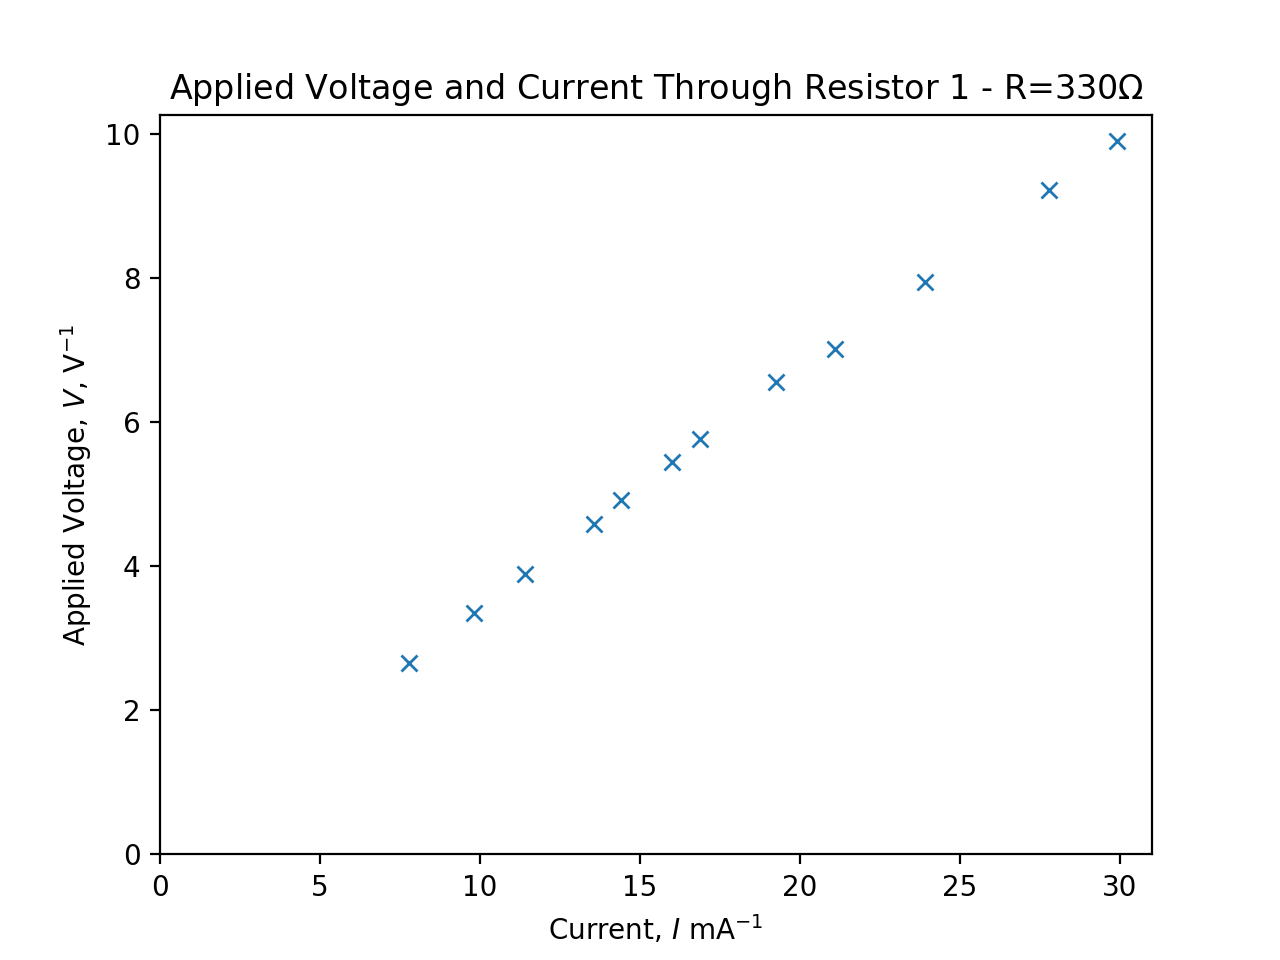

<IPython.core.display.Javascript object>


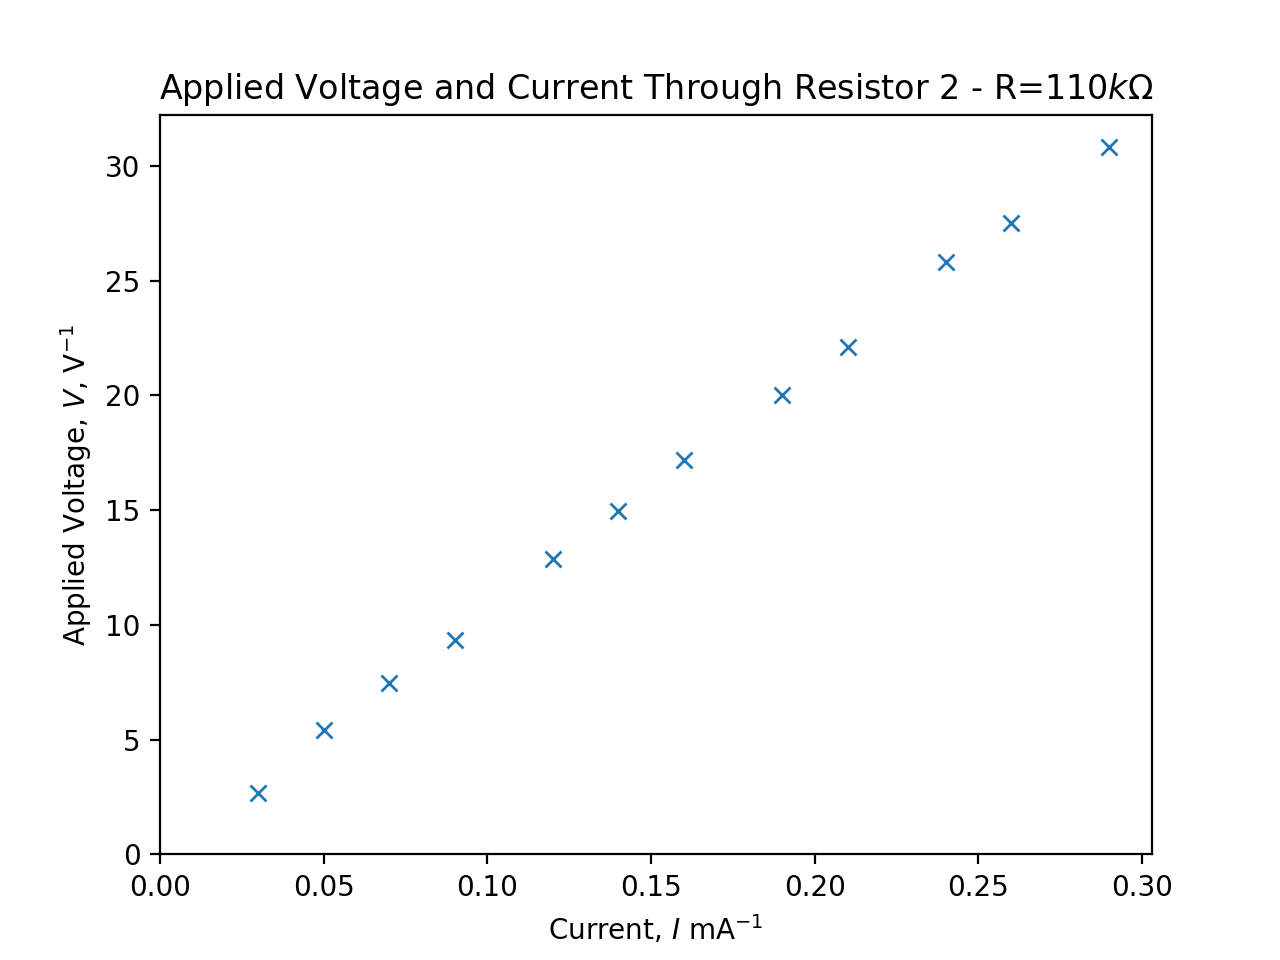

In [94]:
import matplotlib.pyplot as plt # Import the relevant plotting package
%matplotlib notebook

nominal_resistance = ['330$\Omega$', '110$k\Omega$']

for i, data_to_plot in enumerate([Resistor1_data, Resistor2_data]):
    plt.figure() # Open and empty figure
    plt.plot(data_to_plot[:, 1]*1e3, data_to_plot[:, 0], 'x') # I'd like to plot mA, so I've multiplied by 1000
    
    # Change the figures so they both start at (0,0)
    plt.gca().set_xlim(0)
    plt.gca().set_ylim(0)
    
    # Put on titles
    plt.gca().set_title(f"Applied Voltage and Current Through Resistor {i+1} - R={nominal_resistance[i]}")
    
    plt.gca().set_xlabel("Current, $I$ mA$^{-1}$")
    plt.gca().set_ylabel("Applied Voltage, $V$, V$^{-1}$")


This is good - the data show obvious linear behaviour - let's try a line of best fit now. We can fit a polynomial of order 1. That is, a straight line. This is possible usign ```polyfit``` from numpy.

These will be stored as a ```list``` called ```Polynomials```, because I'll want to use them later.

In [71]:
# Make an empty list
Polynomials = []

# Loop through the two sets of data and do it
for i, data_to_fit in enumerate([Resistor1_data, Resistor2_data]):
    # Append the polynomial to the list of polynomials
    Polynomials.append(np.polyfit(data_to_fit[:, 1], data_to_fit[:, 0], 1)) # Our "X" is the current

print(Polynomials)

[array([3.25931354e+02, 1.85101719e-01]), array([ 1.06864245e+05, -1.29071095e-01])]


The list ```Polynomials``` now contains two arrays, which have the coefficients of the two line of best fits. The coefficients in each array are $\vec{P}=[P_0, P_1]$ which represent:

$$V=P_0\cdot A + P_1$$

These can now be used to plot a line of best fit that goes from the origin to the axis limits. Some of the code from above can be repeated and we'll add to it. The line of best fit can be represented by two points - one at X = 0, and one at X = Xmax.

The syntax is slightly changed below to give a *handle* to each of the plots, which is then used to assign a *label*, so the legend can be made automatically.

The method I use to do this is a little over-the-top, but I tend to put things in loops if I have to do *anything* more than once, because it's then easily extensible to doing the whole process again.

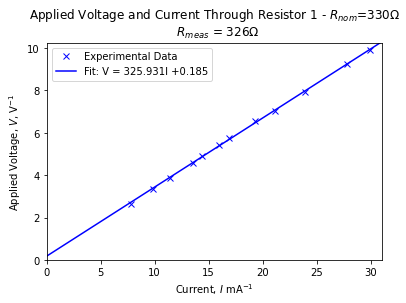

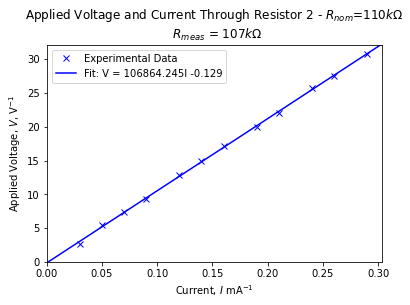

In [85]:
# Make a numpy array for the measured resistances
measured_resistances = np.array(2)

for i, data_to_plot in enumerate([Resistor1_data, Resistor2_data]):
    plt.figure() # Open and empty figure
    expt_data = plt.plot(data_to_plot[:, 1] * 1e3, data_to_plot[:, 0], 'xb') # I'd like to plot mA, so I've multiplied by 1000
    expt_data[0].set_label("Experimental Data")
    
    # Change the figures so they both start at (0,0)
    plt.gca().set_xlim(0)
    plt.gca().set_ylim(0)
    
    # Put on titles
    plt.gca().set_title(f"Applied Voltage and Current Through Resistor {i+1} - R={nominal_resistance[i]}")
    
    plt.gca().set_xlabel("Current, $I$ mA$^{-1}$")
    plt.gca().set_ylabel("Applied Voltage, $V$, V$^{-1}$")
    
    # Make a line of best fit from the data - first we need to find the maximum value of current on the graph
    xlim = plt.gca().get_xlim()[1] # This says "get the x limits, which will be a list, and then get the second element, which will be the maximum"
    
    I_line = np.array([0, xlim])
    V_line = I_line * Polynomials[i][0] / 1e3 + Polynomials[i][1] # Got to remember the line is in A but the plot is in mA
    
    # Plot this line
    line_of_best_fit = plt.plot(I_line, V_line, '-b')
    line_of_best_fit[0].set_label(f"Fit: V = {Polynomials[i][0]:1.3f}I {Polynomials[i][1]:+1.3f}")
    
    # Make a legend
    plt.gca().legend()
    
    # Round the measured resistances to suitable precision
    if i == 0:
        # First reisistor - in Ohms
        measured_resistance = np.round(Polynomials[i][0])
        measured_resistance = f"{measured_resistance:1.0f}$\Omega$"
    else:
        # Second reisistor - in kiloOhms
        measured_resistance = np.round(Polynomials[i][0]/1e3)
        measured_resistance = f"{measured_resistance:1.0f}$k\Omega$"
        
    
    # Put on titles and include the two resistances
    plt.gca().set_title(f"Applied Voltage and Current Through Resistor {i+1} - $R_{{nom}}$={nominal_resistance[i]}\n  $R_{{meas}}$ = {measured_resistance}")

    

# What about putting on the nominal behaviour?

The nominal behaviour of the resistor is given by the nominal resistance - that is, no intercept on the y-axis, and the two values as read from the colour codes.

This can be added including the 5% tolerance.

Again - the code above is repeated, and new stuff added to do this.

<IPython.core.display.Javascript object>


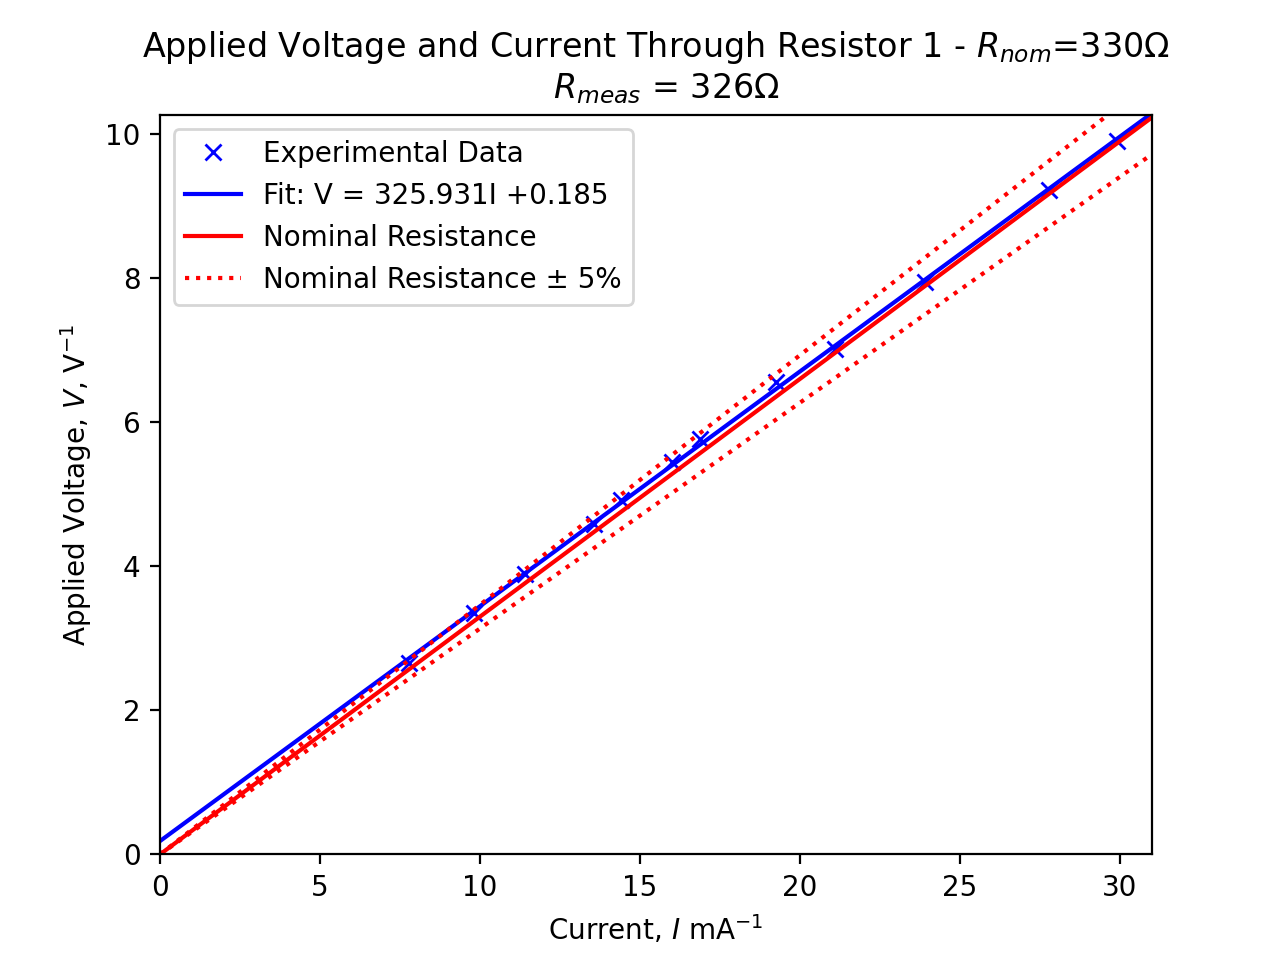

<IPython.core.display.Javascript object>


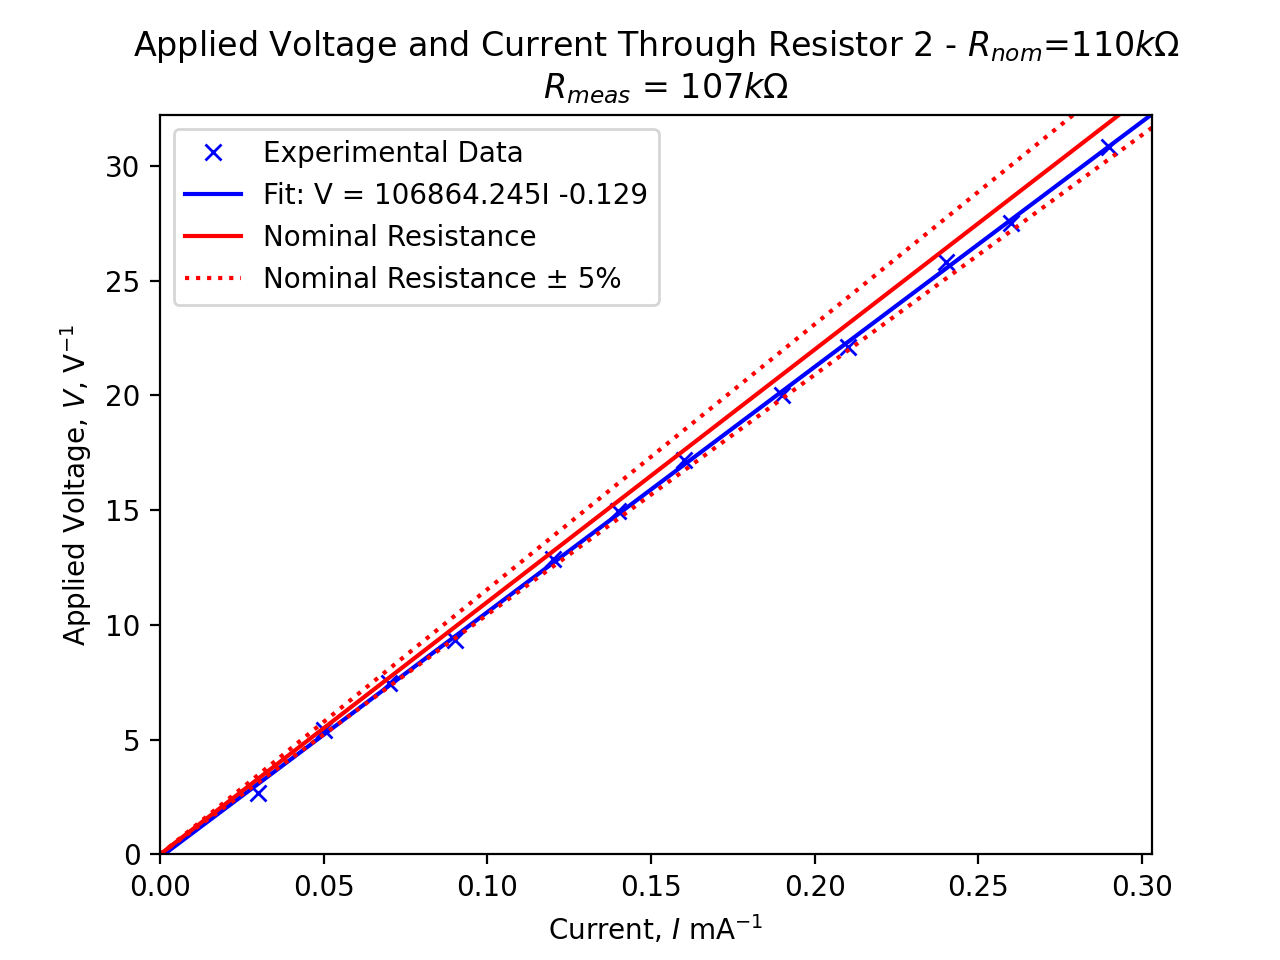

In [100]:
nominal_values_numerical = [330, 110e3] # These were overwritten with text earlier, which was a bit silly
figures = []

for i, data_to_plot in enumerate([Resistor1_data, Resistor2_data]):
    figures.append(plt.figure()) # Open and empty figure
    expt_data = plt.plot(data_to_plot[:, 1] * 1e3, data_to_plot[:, 0], 'xb') # I'd like to plot mA, so I've multiplied by 1000
    expt_data[0].set_label("Experimental Data")
    
    # Change the figures so they both start at (0,0)
    plt.gca().set_xlim(0)
    plt.gca().set_ylim(0)
    
    
    
    plt.gca().set_xlabel("Current, $I$ mA$^{-1}$")
    plt.gca().set_ylabel("Applied Voltage, $V$, V$^{-1}$")
    
    # Make a line of best fit from the data - first we need to find the maximum value of current on the graph
    xlim = plt.gca().get_xlim()[1] # This says "get the x limits, which will be a list, and then get the second element, which will be the maximum"
    
    I_line = np.array([0, xlim])
    V_line = I_line * Polynomials[i][0] / 1e3 + Polynomials[i][1] # Got to remember the line is in A but the plot is in mA
    
    # Plot this line
    line_of_best_fit = plt.plot(I_line, V_line, '-b')
    line_of_best_fit[0].set_label(f"Fit: V = {Polynomials[i][0]:1.3f}I {Polynomials[i][1]:+1.3f}")
    
    # Make a legend
    plt.gca().legend()
    
    # Round the measured resistances to suitable precision
    if i == 0:
        # First reisistor - in Ohms
        measured_resistance = np.round(Polynomials[i][0])
        measured_resistance = f"{measured_resistance:1.0f}$\Omega$"
    else:
        # Second reisistor - in kiloOhms
        measured_resistance = np.round(Polynomials[i][0]/1e3)
        measured_resistance = f"{measured_resistance:1.0f}$k\Omega$"
        
    # Put on a line for the nominal resistance - we can use the data from I_line above to make this   
    V_nom_line = I_line * nominal_values_numerical[i] / 1e3
    nominal_line = plt.plot(I_line, V_nom_line, '-r')
    nominal_line[0].set_label("Nominal Resistance")
    
    # And lines for the tolerances
    V_nom_line_tol = I_line * nominal_values_numerical[i] / 1e3 * 1.05
    nominal_line_tolerance = plt.plot(I_line, V_nom_line_tol, ':r')
    V_nom_line_tol = I_line * nominal_values_numerical[i] / 1e3 * 0.95
    nominal_line_tolerance = plt.plot(I_line, V_nom_line_tol, ':r')
    nominal_line_tolerance[0].set_label("Nominal Resistance ± 5%")

    
    # Make a legend
    plt.gca().legend()
    
    plt.gca().set_title(f"Applied Voltage and Current Through Resistor {i+1} - $R_{{nom}}$={nominal_resistance[i]}\n  $R_{{meas}}$ = {measured_resistance}")

    
#     # Put on titles and include the two resistances
#     plt.gca().set_title(f"Applied Volt

# Exporting these figures

Now, most undergrads will take a *screenshot* to get a figure out, which results in a bitmap that's lossy, and looks terrible when put into an actual report. So we'll go over how to export as a vector format, that means you can zoom in on it infinitely.

You may have noted that I slightly changed the syntax above to make a new list called ```figures``` which means that each of those figures can be loaded and shown again:

In [106]:
print(figures)

for i, figure in enumerate(figures):
    figure.savefig(f"Resistor {i+1} plot.pdf")  


[<Figure size 1280x960 with 1 Axes>, <Figure size 1280x960 with 1 Axes>]


Take it out, and look at the pdf - tell me that's not better than a screenshot? Zoom right in and have a look at it. You can change the file extension to a lot of useful types - such as svg. [Take a look here for more info](https://futurestud.io/tutorials/matplotlib-save-plots-as-file#saveaspdffile)


## One last bit

Looking at the PDF figures, it would be better if the data points were *on top* of the lines, to suit my anally-retentive wishes. I'll also change the colour of the line of best fit so the data points don't blend into it.

You can change this using something I literally just googled - the "z order". I'll repeat the code above and make a couple of changes:

<IPython.core.display.Javascript object>


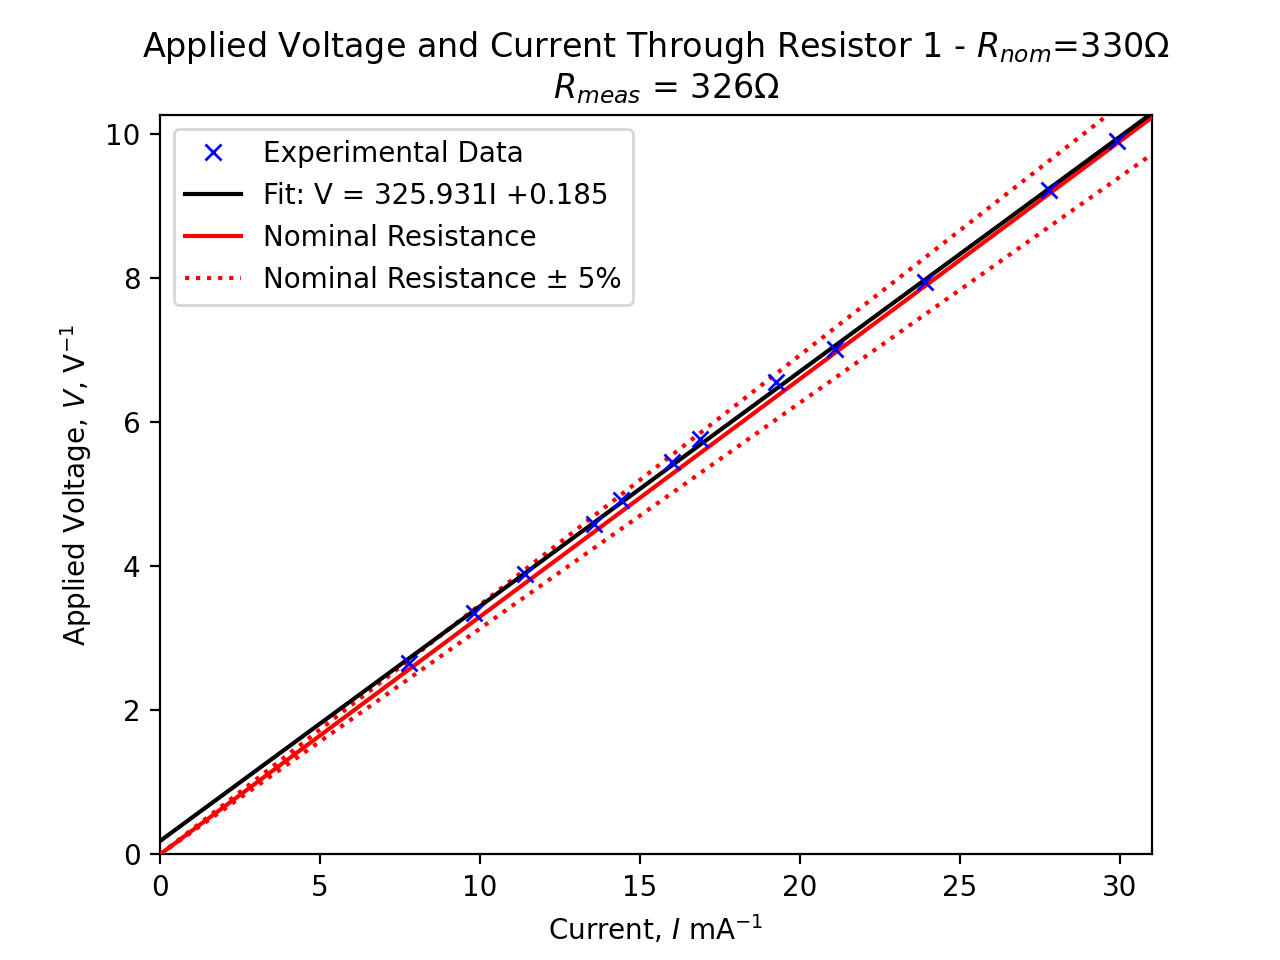

<IPython.core.display.Javascript object>


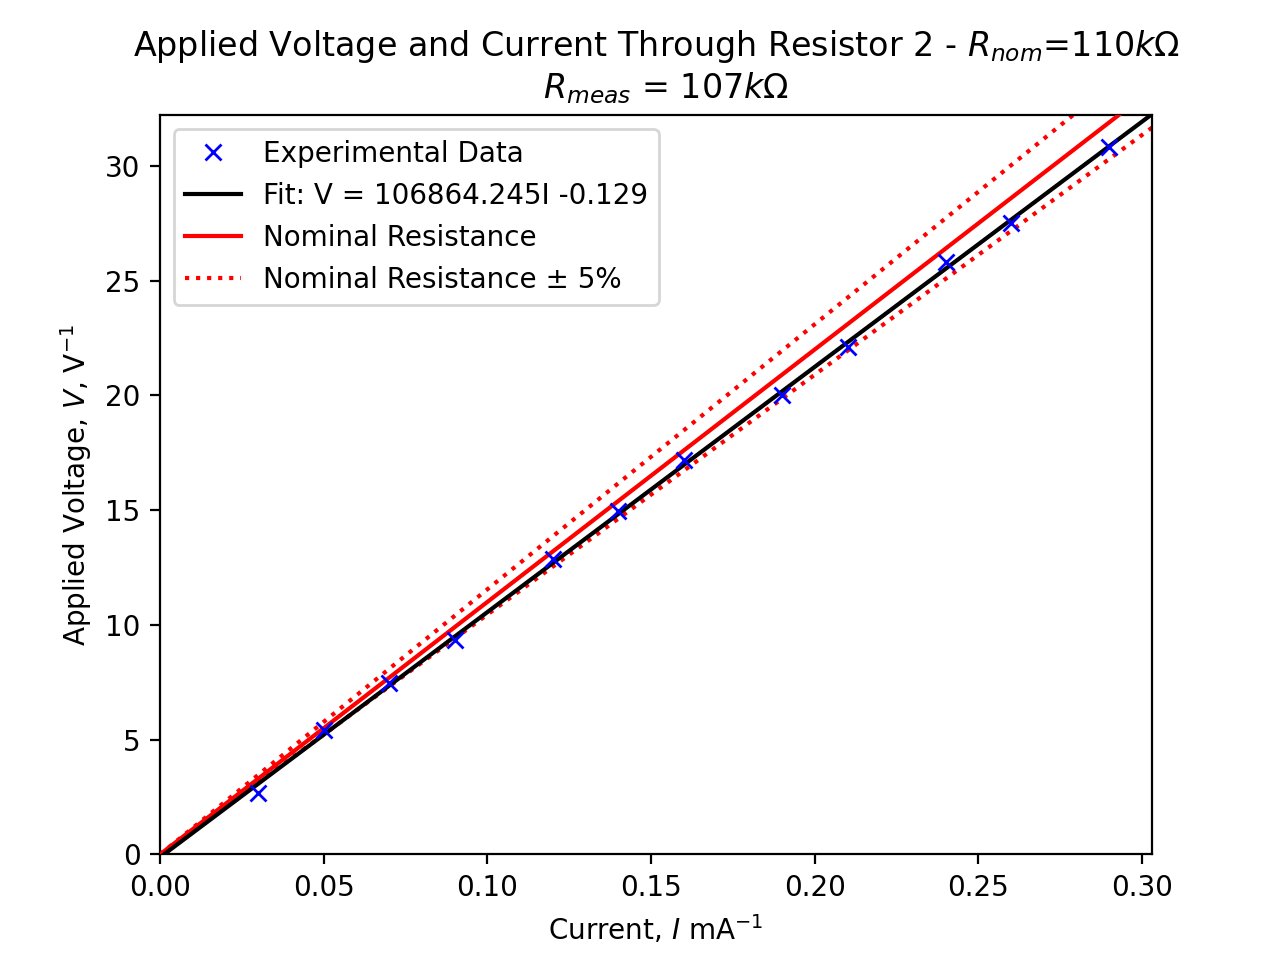

In [108]:
nominal_values_numerical = [330, 110e3] # These were overwritten with text earlier, which was a bit silly
ordered_figures = []

for i, data_to_plot in enumerate([Resistor1_data, Resistor2_data]):
    ordered_figures.append(plt.figure()) # Open and empty figure
    expt_data = plt.plot(data_to_plot[:, 1] * 1e3, data_to_plot[:, 0], 'xb', zorder=5) # I'd like to plot mA, so I've multiplied by 1000
    expt_data[0].set_label("Experimental Data")
    
    # Change the figures so they both start at (0,0)
    plt.gca().set_xlim(0)
    plt.gca().set_ylim(0)
    
    
    
    plt.gca().set_xlabel("Current, $I$ mA$^{-1}$")
    plt.gca().set_ylabel("Applied Voltage, $V$, V$^{-1}$")
    
    # Make a line of best fit from the data - first we need to find the maximum value of current on the graph
    xlim = plt.gca().get_xlim()[1] # This says "get the x limits, which will be a list, and then get the second element, which will be the maximum"
    
    I_line = np.array([0, xlim])
    V_line = I_line * Polynomials[i][0] / 1e3 + Polynomials[i][1] # Got to remember the line is in A but the plot is in mA
    
    # Plot this line
    line_of_best_fit = plt.plot(I_line, V_line, '-k', zorder=4)
    line_of_best_fit[0].set_label(f"Fit: V = {Polynomials[i][0]:1.3f}I {Polynomials[i][1]:+1.3f}")
    
    # Make a legend
    plt.gca().legend()
    
    # Round the measured resistances to suitable precision
    if i == 0:
        # First reisistor - in Ohms
        measured_resistance = np.round(Polynomials[i][0])
        measured_resistance = f"{measured_resistance:1.0f}$\Omega$"
    else:
        # Second reisistor - in kiloOhms
        measured_resistance = np.round(Polynomials[i][0]/1e3)
        measured_resistance = f"{measured_resistance:1.0f}$k\Omega$"
        
    # Put on a line for the nominal resistance - we can use the data from I_line above to make this   
    V_nom_line = I_line * nominal_values_numerical[i] / 1e3
    nominal_line = plt.plot(I_line, V_nom_line, '-r', zorder=3)
    nominal_line[0].set_label("Nominal Resistance")
    
    # And lines for the tolerances
    V_nom_line_tol = I_line * nominal_values_numerical[i] / 1e3 * 1.05
    nominal_line_tolerance = plt.plot(I_line, V_nom_line_tol, ':r', zorder=2)
    V_nom_line_tol = I_line * nominal_values_numerical[i] / 1e3 * 0.95
    nominal_line_tolerance = plt.plot(I_line, V_nom_line_tol, ':r', zorder=1)
    nominal_line_tolerance[0].set_label("Nominal Resistance ± 5%")

    
    # Make a legend
    plt.gca().legend()
    
    plt.gca().set_title(f"Applied Voltage and Current Through Resistor {i+1} - $R_{{nom}}$={nominal_resistance[i]}\n  $R_{{meas}}$ = {measured_resistance}")

    

for i, figure in enumerate(ordered_figures):
    figure.savefig(f"Resistor {i+1} plot - better order.pdf")  


# What about Plotly?

Plotly is pretty cool for creating interactive plots that you can click/zoom/hide/show things - this is great for creating HTML that you can then put into webpages like [aircraftflightmechanics.com](www.aircraftflightmechanics.com).

This is in only included as an extra bit for those of you who want to up your plotting game. None of this is required for this course but it looks nice and I like to share this stuff.

In [203]:
import numpy as np
import plotly.graph_objects as go

import plotly.express as px

plotcols = px.colors.qualitative.Plotly

nominal_resistance = ['330\Omega', '110k\Omega']


## Note that there's a lot of slightly peculiar logic in the code below that enables the annotation and the legend
# to to be printed. You don't need to worry about it.

for i, data in enumerate([Resistor1_data, Resistor2_data]):

    fig = go.Figure()

    # Plot the line of best fit
    if i == 0:
        I_line = np.array([0, round(max(data[:, 1]), 2)]) # Round to 2nd decimal
    else:
        I_line = np.array([0, round(max(data[:, 1]), 4)]) # Round to 4th decimal
    V_line = I_line * Polynomials[i][0] + Polynomials[i][1] # Got to remember the line is in A but the plot is in mA

    fig.add_trace(go.Scatter(x=I_line, y=V_line, mode="lines", legendgroup="Fit", name=f"Fit: V = {Polynomials[i][0]:1.3f}I {Polynomials[i][1]:+1.3f}", showlegend=True, line=dict(color='blue', width=2)))

    # Make the measured resistance numerical again
    if i == 0:
        # First reisistor - in Ohms
        measured_resistance = np.round(Polynomials[i][0])
    else:
        # Second reisistor - in kiloOhms
        measured_resistance = np.round(Polynomials[i][0]/1e3)
    
    
#     print(['$\text{Applied Voltage and Current Through Resistor ' + str(i+1) + '} R_{nom} = ' + nominal_resistance[i] + ' R_{meas} = ' + str(measured_resistance) + '$'])
    
    if i == 0: 
        unit = ""
    else:
        unit = "k"
        
    fig.update_layout(
        title='$\\text{Applied Voltage and Current Through Resistor ' + str(i+1) + '    }  :  R_{nom} = ' + nominal_resistance[i] + '\\text{,     } R_{meas} = ' + str(measured_resistance) + unit + '\Omega$',
        xaxis_title="$\\frac{\\text{Current}}{A}$",
        yaxis_title="$\\frac{\\text{Applied Voltage}}{V}$",
    )
    
    # Put on the nominal and tolerances
    V_nom = I_line * nominal_values_numerical[i]
    V_nom_plus = I_line * nominal_values_numerical[i] * 1.05
    V_nom_minus = I_line * nominal_values_numerical[i] * 0.95
    fig.add_trace(go.Scatter(x=I_line, y=V_nom, mode="lines", legendgroup="Nom", name="Nominal", showlegend=True, line=dict(color='firebrick', width=2)))
    fig.add_trace(go.Scatter(x=I_line, y=V_nom_plus, mode="lines", legendgroup="Nom", name="Tolerance", showlegend=True, line=dict(color='firebrick', width=1, dash="dash")))
    fig.add_trace(go.Scatter(x=I_line, y=V_nom_minus, mode="lines", legendgroup="Nom", name="Tolerance", showlegend=False, line=dict(color='firebrick', width=1, dash="dash")))

    # Plot the raw data
    fig.add_trace(go.Scatter(x=data[:, 1], y=data[:, 0], mode="markers", marker_symbol="circle-open-dot", legendgroup="Data", name="Measured Data", showlegend=True, marker=dict(
            color='Blue',
            size=12,
            )))
    
    
    # Change the axes limits
    fig.update_xaxes(range=[0, max(I_line)])
    fig.update_yaxes(range=[0, max(V_line)])
    fig.show()


